# Исследование надёжности заёмщиков

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-и-задача" data-toc-modified-id="Описание-и-задача-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание и задача</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Ответьте-на-вопросы" data-toc-modified-id="Ответьте-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответьте на вопросы</a></span><ul class="toc-item"><li><span><a href="#Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-наличием-детей-и-возвратом-кредита-в-срок?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Есть ли зависимость между наличием детей и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-семейным-положением-и-возвратом-кредита-в-срок?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Есть ли зависимость между семейным положением и возвратом кредита в срок?</a></span></li><li><span><a href="#Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?" data-toc-modified-id="Есть-ли-зависимость-между-уровнем-дохода-и-возвратом-кредита-в-срок?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?</a></span></li><li><span><a href="#Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?" data-toc-modified-id="Как-разные-цели-кредита-влияют-на-его-возврат-в-срок?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Как разные цели кредита влияют на его возврат в срок?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание и задача

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:
* children — количество детей в семье
* days_employed — общий трудовой стаж в днях
* dob_years — возраст клиента в годах
* education — уровень образования клиента
* education_id — идентификатор уровня образования
* family_status — семейное положение
* family_status_id — идентификатор семейного положения
* gender — пол клиента
* income_type — тип занятости
* debt — имел ли задолженность по возврату кредитов
* total_income — ежемесячный доход
* purpose — цель получения кредита

## Предобработка данных

### Импорт данных

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

In [2]:
borrowers = pd.read_csv('/datasets/data.csv')
borrowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [3]:
borrowers.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Замечание**

<div class="answear">Данные имеют правильный тип, присутствует много пропусков в колонках `days_employed` и `total_income`. Предполагаю, что появление пропусков связано с отказом заёмщиков предоставлять эти данные.
    </div>

### Обработка пропусков

In [4]:
print(borrowers['children'].value_counts()) # В 47 случаях количество детей указано [-1], исправим это на [1]
borrowers.loc[borrowers['children'] == -1, 'children'] = 1

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


In [5]:
borrowers['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [6]:
"""В 15906 случаях рабочий стаж является отрицательным, возьмем модуль числа"""

print('Количество записей с отрицательным стажем:', borrowers[borrowers['days_employed'] < 0]['days_employed'].count()) 
borrowers['days_employed'] = borrowers['days_employed'].apply(lambda x: math.fabs(x))
print('Количество пропусков в графе стажа:', borrowers['days_employed'].isnull().sum())
print('Количество пропусков в графе стажа к общему числу записей: {:.1%}'
      .format(borrowers['days_employed'].isnull().sum() / borrowers.shape[0]))

Количество записей с отрицательным стажем: 15906
Количество пропусков в графе стажа: 2174
Количество пропусков в графе стажа к общему числу записей: 10.1%


Пропущено 10.1% от общего числа записей, нельзя просто выкинуть их.     
Пропуски в колонке с рабочим стажем я бы не стал интерпретировать как отсутствие стажа, поэтому предлагаю следующее:
* Разделить выборку на является и не является пенсионером
* Найти у каждой группы средний или медианный стаж
* Используя эти данные заполнить пропуски в соответствующих записях

In [7]:
bor_pensioners = borrowers[borrowers['income_type'] == 'пенсионер']
bor_not_pensioners = borrowers[borrowers['income_type'] != 'пенсионер']

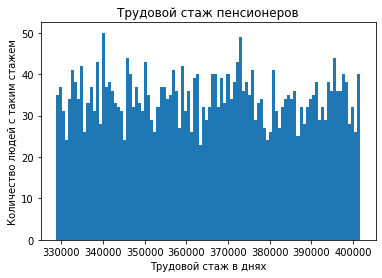

In [8]:
plt.xlabel('Трудовой стаж в днях')
plt.ylabel('Количество людей с таким стажем')
plt.title('Трудовой стаж пенсионеров')
plt.hist(bor_pensioners['days_employed'], bins=100);

Для лучшего восприятия гистограммы трубового стажа людей, которые не являются пенсионерами, изобразим только тех, чей трудовой стаж меньше 15 000 дней, так как количество людей с большим стажем составлет всего `0.09%` от общего числа не пенсионеров.

Количесто людей не пенсионеров, чей стаж больше 15000 дней: 0.09%


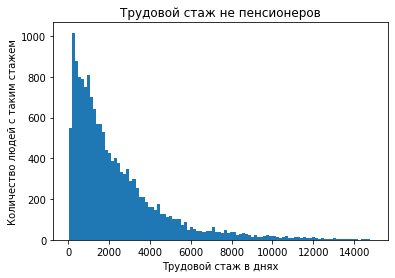

In [9]:
bor_not_pensioners_reduced = bor_not_pensioners[bor_not_pensioners['days_employed'] < 15000]['days_employed']
print('Количесто людей не пенсионеров, чей стаж больше 15000 дней: {:.2%}'.format(1 - (bor_not_pensioners_reduced.count() / bor_not_pensioners['days_employed'].count())))

plt.xlabel('Трудовой стаж в днях')
plt.ylabel('Количество людей с таким стажем')
plt.title('Трудовой стаж не пенсионеров')
plt.hist(bor_not_pensioners_reduced, bins=100);

В случае с **пенсионерами** распределние отработанных дней даёт примерно одиновый результат для медианного и среднего значений.    
Для **не пенсионеров** разброс между максимальным и минимальным стажем очень велик, из гистограммы видно, что крайне малый процент записей сильно искажает среднее, поэтому я возьму медиану.

In [10]:
pensioner_days_mean = bor_pensioners[bor_pensioners['days_employed'] > 0]['days_employed'].mean()
not_pensioner_days_median = bor_not_pensioners[bor_not_pensioners['days_employed'] > 0]['days_employed'].median()
print('Средний стаж заёмщиков пенсионеров {:.0f} дней'.format(pensioner_days_mean))
print('Медианный стаж заёмщиков не пенсионеров {:.0f} дней'.format(not_pensioner_days_median))

Средний стаж заёмщиков пенсионеров 365003 дней
Медианный стаж заёмщиков не пенсионеров 1630 дней


In [11]:
borrowers.loc[borrowers['income_type'] == 'пенсионер', 'days_employed'] = \
    bor_pensioners['days_employed'].fillna(pensioner_days_mean)
borrowers.loc[borrowers['income_type'] != 'пенсионер', 'days_employed'] = \
    bor_not_pensioners['days_employed'].fillna(not_pensioner_days_median)

In [12]:
print('Количество пропусков в колонке "days_employed":', borrowers['days_employed'].isnull().sum())

Количество пропусков в колонке "days_employed": 0


Посмотрим, сколько раз возраст в записи равен нулю. Заменим его на средний возраст согласно его катогерии: пенсионер или нет.

In [13]:
print('Количество записей, где возраст равен нулю:', borrowers.loc[borrowers['dob_years'] == 0, 'dob_years'].count())

Количество записей, где возраст равен нулю: 101


In [14]:
borrowers.loc[(borrowers['dob_years'] == 0) & (borrowers['income_type'] == 'пенсионер'), 'dob_years'] = \
    math.ceil(bor_pensioners[bor_pensioners ['dob_years'] != 0]['dob_years'].mean())
borrowers.loc[(borrowers['dob_years'] == 0) & (borrowers['income_type'] != 'пенсионер'), 'dob_years'] = \
    math.ceil(bor_not_pensioners[bor_not_pensioners ['dob_years'] != 0]['dob_years'].mean())

In [15]:
print('Количество записей, где возраст равен нулю:', borrowers.loc[borrowers['dob_years'] == 0, 'dob_years'].count())

Количество записей, где возраст равен нулю: 0


Посмотрим на гистограмму колонки `total_income`. Даннные напоминают нормальное распределение, но есть длинный хвост.

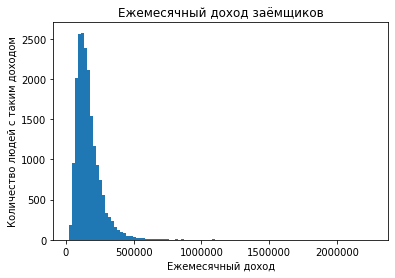

In [16]:
plt.xlabel('Ежемесячный доход')
plt.ylabel('Количество людей с таким доходом')
plt.title('Ежемесячный доход заёмщиков')
plt.hist(borrowers['total_income'], bins=100);

Попробуем проследить корреляцию между возрастом и заработком.    
По оси абцисс отложим возраст заёмщика, а по оси ординат - заработок.

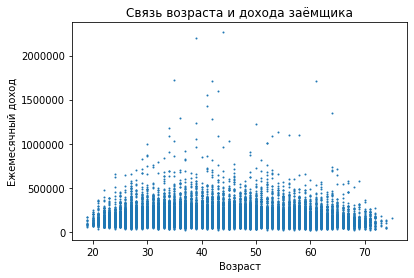

In [17]:
plt.xlabel('Возраст')
plt.ylabel('Ежемесячный доход')
plt.title('Связь возраста и дохода заёмщика')
plt.plot(borrowers['dob_years'], borrowers['total_income'], linestyle='', marker='o', ms=1);

Исходя из полученного графика можно сделать вывод, что есть небольшая корреляция между возрастом и заработком, она проявляется в том, что меньше всего в среднем заработывают люди до ~ 27 лет, и после ~ 60 лет.    
При заполнении пропусков в колонке `total_income`, я разделю все записи по возрастам на 3 группы и каждому пропущенному значению задам.    

---

На следующем графике вертикальные красные прямые разделяют ось абцисс на три отрезка - три возрастные группы.

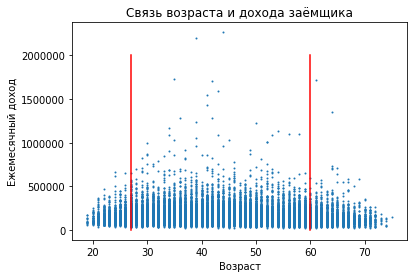

In [18]:
plt.xlabel('Возраст')
plt.ylabel('Ежемесячный доход')
plt.title('Связь возраста и дохода заёмщика')
plt.plot(borrowers['dob_years'], borrowers['total_income'], linestyle='', marker='o', ms=1);
plt.plot([27, 27], [0, 2000000], color='red')
plt.plot([60, 60], [0, 2000000], color='red');

In [19]:
income_before_27 = borrowers[borrowers['dob_years'] <= 26]['total_income'].median()
income_after_27_before_60 = borrowers[(borrowers['dob_years'] > 26) & (borrowers['dob_years'] < 60)]['total_income'].median()
income_after_60 = borrowers[borrowers['dob_years'] >= 60]['total_income'].median()
print('Заработок до 26 лет: {:.0f}\nЗаработок от 26 до 60 лет: {:.0f}\nЗаработок от 60 лет: {:.0f}'.format(income_before_27, income_after_27_before_60, income_after_60))

Заработок до 26 лет: 136651
Заработок от 26 до 60 лет: 149481
Заработок от 60 лет: 123420


In [20]:
def fill_income(row):
    if(pd.isna(row['total_income'])):
        years = row['dob_years']
        if(years <= 26):
            return income_before_27
        elif(years < 60):
            return income_after_27_before_60
        return income_after_60
    return row['total_income']

borrowers['total_income'] = borrowers.apply(fill_income, axis=1)
total_income_missed = borrowers['total_income'].isnull().sum()
if(total_income_missed == 0):
    print('Пропуски удалены')
else:
    print('Количество пропуском в "total_income":', total_income_missed)

Пропуски удалены


**Вывод**

* Были найдены и исправлены отрицательные значения в колонке `children`. 
* Множество записей оказались с пропущенным значением `days_employed`. Чтобы исправить это, в записях были выделены две группы: пенсионеры и не пенсионеры.  Пропущенные значения заполнялись с учетом принадлежности к той или иной группе медианными значениями.
* Пропуски в колонках `dob_years` были заполнены аналогичным образом.
* Большое количество пропуском было обнаружено в колонке `total_income`, чтобы устранить их были выделены 3 возрастные группы: до 27 лет, от 27 до 60 лет, после 60 лет. В каждом из них был посчитан медианный заработок и сопоставлен пропущенным значением в соответствующих возрастных группах.
* Пропуски в данных могли возникнуть по причине того, что клиенты отказались предоставлять эту информацию.

### Замена типа данных

In [21]:
borrowers['days_employed'] = borrowers['days_employed'].astype('int')
borrowers['total_income'] = borrowers['total_income'].astype('int')

**Вывод**

Два столбца в датасете являлись вещественными - `float`. Они были приведены к целочисленному типу `int` с помощью метода `astype(<тип>)`    
Данный метод был выбран, потому что он позволяет преобразовать данные в нужный тип.

### Обработка дубликатов

In [22]:
borrowers['education'] = borrowers['education'].str.lower()
borrowers['family_status'] = borrowers['family_status'].str.lower()
borrowers = borrowers.drop_duplicates().reset_index(drop=True)

**Вывод**

В ходе выполнения исследования выяснилось, что столбец `education` содержал одинаковые записи, написанные в разном регистре. Записи приведены к одному регистру. Все идентичные записи в датасете удалены.

Для поиска и удаления дубликатов использовался метод `drop_duplicates()`. Дубликаты могли возникнуть из-за слияние баз данных или человеской ошибки и оформление одной и той же заявки дважды.

### Лемматизация

In [23]:
lemmas = []
for row in borrowers.loc[:, 'purpose']:
    lemmas.extend(m.lemmatize(row))
print(Counter(lemmas))

Counter({' ': 33568, '\n': 21453, 'недвижимость': 6351, 'покупка': 5897, 'жилье': 4460, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2323, 'свой': 2230, 'на': 2221, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'проведение': 767, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'подержанный': 486, 'подержать': 478, 'приобретение': 461, 'профильный': 436})


**Вывод**

Лемматизация производилась с помощью библиотеки `pymystem3`. Анализируя уникальные записи в стобце `purpose` и частоты слова из результаты лемматизации можно выделить 4 общих направления кредитования.    
Направленности кредитов (шт.):
* Операции с недвижимость - покупка, аренда, строительство и ремонт - *10811*
* Операции с автомобилями - покупка и ремонт - *4306*
* Образование - *4013*
* Свадьба - *2323*

### Категоризация данных

In [24]:
family_status_dict = borrowers[['family_status', 'family_status_id']].drop_duplicates().reset_index(drop=True)
education_dict = borrowers[['education', 'education_id']].drop_duplicates().reset_index(drop=True)
display(family_status_dict)
display(education_dict)

def category_purpose(purpose):
    vocabulary = ['свадьба', 'недвижимость', 'автомобиль', 'образование']
    lemma = m.lemmatize(purpose)
    for word in lemma:
        for voc_word in vocabulary:
            if (word == voc_word):
                return voc_word
        if (word == 'жилье'): return vocabulary[1]
    return 'другое'
borrowers['purpose_lemma'] = borrowers['purpose'].apply(category_purpose)
display(borrowers['purpose_lemma'].value_counts())
borrowers.head(10)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,не женат / не замужем,4


,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2323
Name: purpose_lemma, dtype: int64

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_lemma
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,недвижимость
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,недвижимость
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,свадьба
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,недвижимость


In [25]:
borrowers.groupby('debt')['total_income'].mean()

debt
0    165607.216366
1    161457.695577
Name: total_income, dtype: float64

Медианный доход у тех, кто возвращает кредит в срок, и у тех, кто имеет просроченные платежи, совпадает.    
Теперь я хочу разделить людей на 5 групп по уровню доходов и посчитать процент тех, кто опаздывает с оплатой кредита.    
Применю стратификацию американских учёных Уильяма Томпсона и Джозефа Хики (*источник: William Thompson, Joseph Hickey. Society in Focus. Boston, MA: Pearson, 2005. 0-205-41365-X*).

In [26]:
dollar = 75.59
def total_income_status_func(total_income):
    total_income *= 12/dollar/1000
    if(total_income < 16):
        return 'Низший класс'
    elif(total_income < 30):
        return 'Рабочий класс'
    elif(total_income < 75):
        return 'Низший средний класс'
    elif(total_income < 140):
        return 'Высший средний класс'
    else:
        return 'Высший класс'

In [27]:
borrowers['total_income_status'] = borrowers['total_income'].apply(total_income_status_func)
print(borrowers['total_income_status'].value_counts())

Рабочий класс           11071
Низший средний класс     5535
Низший класс             4564
Высший средний класс      252
Высший класс               31
Name: total_income_status, dtype: int64


**Вывод**

Во время предобработки данных я выделял 3 типа категорий:
* Возрастные категории для расчета дохода.
* Категории занятости: деление на пенсионеров и не пенсионеров для расчета трудового стажа.
* Категории про уровню доходов

Помимо этого я выделил два словаря:
* Словарь семейного статуса и его идентификатора
* Слова образования и его идентификатора

Также каждой цели кредита сопоставлена одна из 4 лемм: `недвижимость`, `автомобиль`,`образование`, `свадьба`.
Выбор лемм основан на том, что цели "покупка жилья" и "покупка жилой недвижимости", так же как и "сыграть свадьбу" и "на проведение свадьбы" имеют одну и ту же природу. Поэтому целесообразно выделить их в один подкласс.

## Ответьте на вопросы

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

Связь с наличием детей и возвратом кредита.

In [28]:
temp = borrowers[['children', 'debt']].copy()
debt_with_children = temp[(temp['debt'] == 1) & (temp['children'] > 0)]['debt'].count()
debt_without_children = temp[(temp['debt'] == 1) & (temp['children'] == 0)]['debt'].count()
no_debt_with_children = temp[(temp['debt'] == 0) & (temp['children'] > 0)]['debt'].count()
no_debt_without_children = temp[(temp['debt'] == 0) & (temp['children'] == 0)]['debt'].count()
all_records_with_children = debt_with_children + no_debt_with_children
all_record_without_children = debt_without_children + no_debt_without_children
all_with_debt = debt_with_children + debt_without_children
all_without_debt = no_debt_with_children + no_debt_without_children
print(('Общее количество людей, которые должны банку: {}\n'+
      'Количество должников с детьми: {}\n'+
      'Количество должников без детей: {}\n'+
      'Процент должников среди людей с детьми: {:.2%}\n'+
      'Процент должников среди людей без детей: {:.2%}').format(all_with_debt, debt_with_children, debt_without_children,
                                                               debt_with_children / all_records_with_children,
                                                               debt_without_children / all_record_without_children))
temp.loc[temp['children'] > 0, 'children'] = 1 
debt_pivot_columns = ['children', 'debt_status', 'people_count']
debt_pivot_rows = [['0', 'debtor', debt_without_children], 
                   ['0', 'free', no_debt_without_children],
                   ['⩾ 1', 'debtor', debt_with_children],
                   ['⩾ 1', 'free', no_debt_with_children]]
debt_pivot_data = pd.DataFrame(data=debt_pivot_rows, columns=debt_pivot_columns)
debt_pivot_data = debt_pivot_data.pivot_table(index=['children'], columns='debt_status', values='people_count')
debt_pivot_data['all_people'] = debt_pivot_data['free'] + debt_pivot_data['debtor']
debt_pivot_data['debtor_percentage'] = debt_pivot_data['debtor'] / debt_pivot_data['all_people']
debt_pivot_data['debtor_percentage'] = debt_pivot_data['debtor_percentage'].apply(lambda x: '{:.2%}'.format(x)) 
display(debt_pivot_data)

Общее количество людей, которые должны банку: 1741
Количество должников с детьми: 678
Количество должников без детей: 1063
Процент должников среди людей с детьми: 9.21%
Процент должников среди людей без детей: 7.54%


debt_status,debtor,free,all_people,debtor_percentage
children,,,,
0,1063,13027,14090,7.54%
⩾ 1,678,6685,7363,9.21%


Связь с количеством детей и возвратом кредита.

In [29]:
borrowers.pivot_table(index='children', values='debt', aggfunc='mean')['debt'].apply(lambda x: '{:.2%}'.format(x))

children
0      7.54%
1      9.17%
2      9.45%
3      8.18%
4      9.76%
5      0.00%
20    10.53%
Name: debt, dtype: object

**Вывод**

В абсолютных числах задолжников, у которых *нет детей*, больше, чем задолжников *с детьми*. Однако, нужно принимать во внимание тот факт, что людей *с детьми* меньшинство. Процент задолжников среди людей, у которых *есть дети*, больше на `1.67%`, чем задолжников среди людей *без детей*.   

---

Люди с детьми более склоны быть должниками по кредитам.

---

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [30]:
borrowers.pivot_table(index=['family_status'], values='debt', aggfunc='mean').sort_values('debt')

,debt
family_status,
вдовец / вдова,0.065693
в разводе,0.071130
женат / замужем,0.075452
гражданский брак,0.093494
не женат / не замужем,0.097509


**Вывод**

Вдовцы и вдовы реже других опаздывают с возвратом кредита. Это происходит в `6.56%` случаев.    
Самыми ненадежными в этом плане являются люди не состоявшие в браке. Они в `9.75%` процентах случаев не возвращают кредит в срок. 

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
borrowers.pivot_table(index='total_income_status', values='debt', aggfunc='mean').sort_values('debt')

,debt
total_income_status,
Высший средний класс,0.055556
Высший класс,0.064516
Низший средний класс,0.074435
Низший класс,0.078878
Рабочий класс,0.086081


**Вывод**

Исходя из полученных результатов самыми надеждными заёмщиками являются представители высшего среднего класса, они опаздывают с оплатой кредита лишь в `5.56%` случаев. А вот рабочий класс больше других склонен не возвращать кредит в срок - вероятность просрочки платежа составляет `8.61%`

### Как разные цели кредита влияют на его возврат в срок?

In [32]:
borrowers.pivot_table(index='purpose_lemma', values='debt', aggfunc='mean').sort_values('debt')

,debt
purpose_lemma,
недвижимость,0.072334
свадьба,0.080069
образование,0.092200
автомобиль,0.093590


**Вывод**

Кредиты, целью которых являются операции с недвижимостью, возвращают в срок чаще других. Оплата по кредитам, которые берут для операций, связанных с автомобилями и образованием, оказывается просроченной чаще других. 

##  Общий вывод

* Люди, которые имеют детей, более склоны не вовзращать кредиты
* Самыми надежными заёмщиками являются вдовцы и вдовы. Люди, не состоявшие в браке, чаще других склонны просрочить платеж по кредиту
* Обеспеченные люди с большей вероятностью не будут опаздывать с оплатой кредита. Самыми ненадежными с точки зрения доходов являются заёмщики с заработком от 16 000 до 30 000 долларов в год
* Кредиты, взятые для операций с недвижимостью, оказались лучшими в плане просрочки платежей. Кредиты на автомобили и образование будут просрочены с большей вероятностью.